In [1]:
# load libaries
import numpy as np
import pandas as pd

In [2]:
df=pd.read_csv('diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
df.shape

(768, 9)

In [4]:
df['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

In [5]:
# Feature Variables 
features = df.drop('Outcome',axis=1)
# Target/Dependent Variable - Outcome
target = df['Outcome']
#Conver to Numpy array
features = np.array(features)
target = np.array(target)

Normalize

In [6]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
features =scaler.fit_transform(features)

Train/Test Split

In [7]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test= train_test_split(features,target,test_size=0.2,stratify=target)

In [8]:
x_train.shape,y_train.shape

((614, 8), (614,))

In [9]:
x_test.shape,y_test.shape

((154, 8), (154,))

Naive Bayes Classifier

In [42]:
from sklearn.naive_bayes import GaussianNB

In [44]:
# Train the Model
model = GaussianNB()
model.fit(x_train, y_train)

GaussianNB()

In [118]:
# Predict Outcome
y_pred_train =model.predict(x_train)
y_pred_test = model.predict(x_test)

In [119]:
from sklearn.metrics import accuracy_score , precision_score , recall_score, f1_score

#Precision
precision_train = precision_score(y_true=y_train,y_pred=y_pred_train)
precision_test = precision_score(y_true=y_test,y_pred=y_pred_test)

#Recall
recall_train = recall_score(y_true=y_train,y_pred=y_pred_train)
recall_test = recall_score(y_true=y_test,y_pred=y_pred_test)

#ACC
acc_train = accuracy_score(y_true=y_train,y_pred=y_pred_train)
acc_test = accuracy_score(y_true=y_test,y_pred=y_pred_test)

#F1_score
f1_train = f1_score(y_true=y_train,y_pred=y_pred_train)
f1_test = f1_score(y_true=y_test,y_pred=y_pred_test)

print(f'Precision:\n Train:\n {precision_train}\n Test:\n {precision_test}\n')
print(f'Recall:\n Train:\n {recall_train}\n Test:\n {recall_test}\n')
print(f'Accuracy:\n Train:\n {acc_train}\n Test:\n {acc_test}\n')
print(f'F1 score:\n Train:\n {f1_train}\n Test:\n {f1_test}\n')

Precision:
 Train:
 0.6565656565656566
 Test:
 0.7142857142857143

Recall:
 Train:
 0.6074766355140186
 Test:
 0.6481481481481481

Accuracy:
 Train:
 0.752442996742671
 Test:
 0.7857142857142857

F1 score:
 Train:
 0.6310679611650485
 Test:
 0.6796116504854369



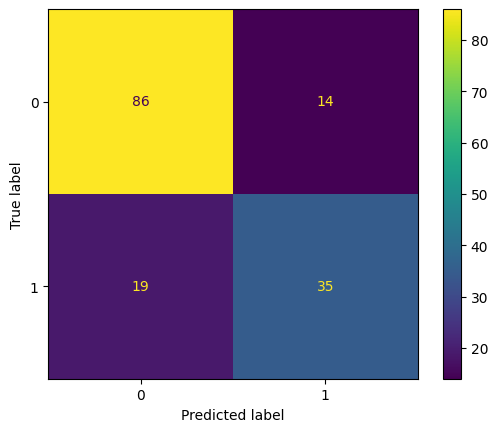

In [120]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
import matplotlib.pyplot as plt
cm = confusion_matrix(y_test, y_pred_test, labels=model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=model.classes_)
disp.plot()
plt.show()

In [57]:
import pickle
# save model
with open('NaiveBayes.pkl','wb') as f:
    pickle.dump(model,f)

KNN (k Nearest Neighbors)

In [53]:
from sklearn.neighbors import KNeighborsClassifier

knn =KNeighborsClassifier(n_neighbors=4)
knn.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=4)

In [113]:
# Predict Outcome
y_pred_train =knn.predict(x_train)
y_pred_test = knn.predict(x_test)

In [114]:
from sklearn.metrics import accuracy_score , precision_score , recall_score, f1_score

#Precision
precision_train = precision_score(y_true=y_train,y_pred=y_pred_train)
precision_test = precision_score(y_true=y_test,y_pred=y_pred_test)

#Recall
recall_train = recall_score(y_true=y_train,y_pred=y_pred_train)
recall_test = recall_score(y_true=y_test,y_pred=y_pred_test)

#ACC
acc_train = accuracy_score(y_true=y_train,y_pred=y_pred_train)
acc_test = accuracy_score(y_true=y_test,y_pred=y_pred_test)

#F1_score
f1_train = f1_score(y_true=y_train,y_pred=y_pred_train)
f1_test = f1_score(y_true=y_test,y_pred=y_pred_test)

print(f'Precision:\n Train:\n {precision_train}\n Test:\n {precision_test}\n')
print(f'Recall:\n Train:\n {recall_train}\n Test:\n {recall_test}\n')
print(f'Accuracy:\n Train:\n {acc_train}\n Test:\n {acc_test}\n')
print(f'F1 score:\n Train:\n {f1_train}\n Test:\n {f1_test}\n')

Precision:
 Train:
 0.8787878787878788
 Test:
 0.625

Recall:
 Train:
 0.5420560747663551
 Test:
 0.46296296296296297

Accuracy:
 Train:
 0.8143322475570033
 Test:
 0.7142857142857143

F1 score:
 Train:
 0.6705202312138727
 Test:
 0.5319148936170213



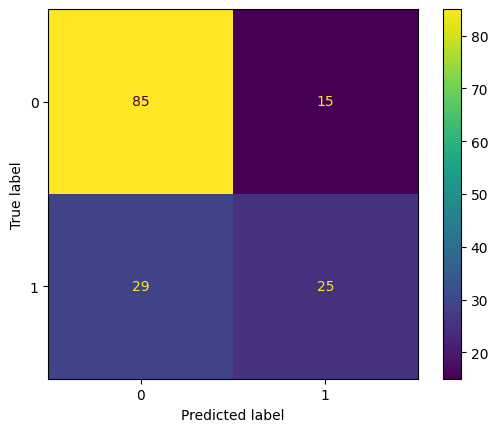

In [115]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
import matplotlib.pyplot as plt
cm = confusion_matrix(y_test, y_pred_test, labels=model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=model.classes_)
disp.plot()
plt.show()

In [59]:
import pickle
# save model
with open('knn.pkl','wb') as f:
    pickle.dump(knn,f)
# load Model
with open('knn.pkl', 'rb') as f:
    knn = pickle.load(f)    

Decision Tree

In [60]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(max_depth=8,min_samples_split=4,min_samples_leaf=2)
dt.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=8, min_samples_leaf=2, min_samples_split=4)

In [110]:
# Predict Outcome
y_pred_train =dt.predict(x_train)
y_pred_test = dt.predict(x_test)

In [111]:
from sklearn.metrics import accuracy_score , precision_score , recall_score, f1_score

#Precision
precision_train = precision_score(y_true=y_train,y_pred=y_pred_train)
precision_test = precision_score(y_true=y_test,y_pred=y_pred_test)

#Recall
recall_train = recall_score(y_true=y_train,y_pred=y_pred_train)
recall_test = recall_score(y_true=y_test,y_pred=y_pred_test)

#ACC
acc_train = accuracy_score(y_true=y_train,y_pred=y_pred_train)
acc_test = accuracy_score(y_true=y_test,y_pred=y_pred_test)

#F1_score
f1_train = f1_score(y_true=y_train,y_pred=y_pred_train)
f1_test = f1_score(y_true=y_test,y_pred=y_pred_test)

print(f'Precision:\n Train:\n {precision_train}\n Test:\n {precision_test}\n')
print(f'Recall:\n Train:\n {recall_train}\n Test:\n {recall_test}\n')
print(f'Accuracy:\n Train:\n {acc_train}\n Test:\n {acc_test}\n')
print(f'F1 score:\n Train:\n {f1_train}\n Test:\n {f1_test}\n')

Precision:
 Train:
 0.8939393939393939
 Test:
 0.6071428571428571

Recall:
 Train:
 0.8271028037383178
 Test:
 0.6296296296296297

Accuracy:
 Train:
 0.9055374592833876
 Test:
 0.7272727272727273

F1 score:
 Train:
 0.8592233009708738
 Test:
 0.6181818181818182



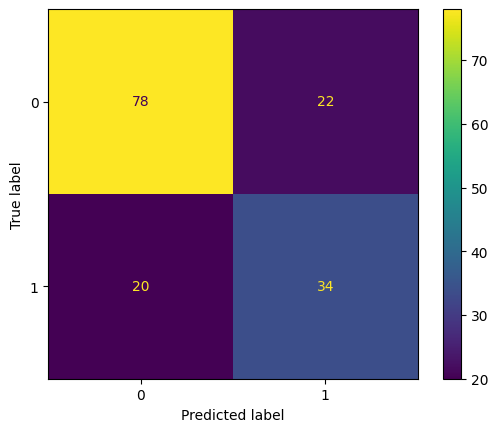

In [112]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
import matplotlib.pyplot as plt
cm = confusion_matrix(y_test, y_pred_test, labels=model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=model.classes_)
disp.plot()
plt.show()

In [71]:
import pickle
# save model
with open('DecisionTree.pkl','wb') as f:
    pickle.dump(dt,f)
# load Model
with open('DecisionTree.pkl', 'rb') as f:
    dt = pickle.load(f)    

Random Forest

In [64]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100,max_depth=8,min_samples_split=4,min_samples_leaf=2)
rf.fit(x_train,y_train)

RandomForestClassifier(max_depth=8, min_samples_leaf=2, min_samples_split=4)

In [107]:
# Predict Outcome
y_pred_train =rf.predict(x_train)
y_pred_test = rf.predict(x_test)

In [108]:
from sklearn.metrics import accuracy_score , precision_score , recall_score, f1_score

#Precision
precision_train = precision_score(y_true=y_train,y_pred=y_pred_train)
precision_test = precision_score(y_true=y_test,y_pred=y_pred_test)

#Recall
recall_train = recall_score(y_true=y_train,y_pred=y_pred_train)
recall_test = recall_score(y_true=y_test,y_pred=y_pred_test)

#ACC
acc_train = accuracy_score(y_true=y_train,y_pred=y_pred_train)
acc_test = accuracy_score(y_true=y_test,y_pred=y_pred_test)

#F1_score
f1_train = f1_score(y_true=y_train,y_pred=y_pred_train)
f1_test = f1_score(y_true=y_test,y_pred=y_pred_test)

print(f'Precision:\n Train:\n {precision_train}\n Test:\n {precision_test}\n')
print(f'Recall:\n Train:\n {recall_train}\n Test:\n {recall_test}\n')
print(f'Accuracy:\n Train:\n {acc_train}\n Test:\n {acc_test}\n')
print(f'F1 score:\n Train:\n {f1_train}\n Test:\n {f1_test}\n')

Precision:
 Train:
 0.9435897435897436
 Test:
 0.717391304347826

Recall:
 Train:
 0.8598130841121495
 Test:
 0.6111111111111112

Accuracy:
 Train:
 0.9332247557003257
 Test:
 0.7792207792207793

F1 score:
 Train:
 0.8997555012224939
 Test:
 0.6599999999999999



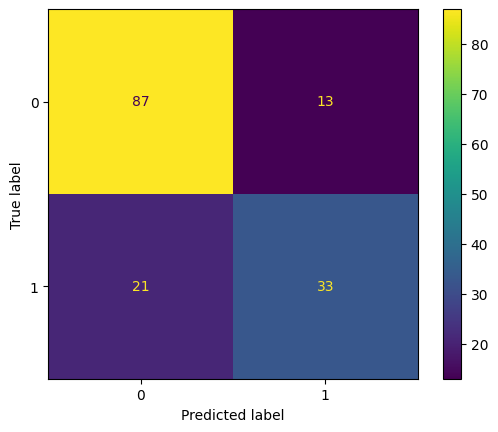

In [109]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
import matplotlib.pyplot as plt
cm = confusion_matrix(y_test, y_pred_test, labels=model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=model.classes_)
disp.plot()
plt.show()

In [73]:
import pickle
# save model
with open('RandomForest.pkl','wb') as f:
    pickle.dump(rf,f)
# load Model
with open('RandomForest.pkl', 'rb') as f:
    rf = pickle.load(f)    

SVM (Support Vector Machine)

In [74]:
from sklearn import svm

#support vector clsssifier
#support vector kernel = linear
svm_model = svm.SVC(kernel='linear')
svm_model.fit(x_train,y_train)

SVC(kernel='linear')

In [104]:
# Predict Outcome
y_pred_train =svm_model.predict(x_train)
y_pred_test = svm_model.predict(x_test)

In [105]:
from sklearn.metrics import accuracy_score , precision_score , recall_score, f1_score

#Precision
precision_train = precision_score(y_true=y_train,y_pred=y_pred_train)
precision_test = precision_score(y_true=y_test,y_pred=y_pred_test)

#Recall
recall_train = recall_score(y_true=y_train,y_pred=y_pred_train)
recall_test = recall_score(y_true=y_test,y_pred=y_pred_test)

#ACC
acc_train = accuracy_score(y_true=y_train,y_pred=y_pred_train)
acc_test = accuracy_score(y_true=y_test,y_pred=y_pred_test)

#F1_score
f1_train = f1_score(y_true=y_train,y_pred=y_pred_train)
f1_test = f1_score(y_true=y_test,y_pred=y_pred_test)

print(f'Precision:\n Train:\n {precision_train}\n Test:\n {precision_test}\n')
print(f'Recall:\n Train:\n {recall_train}\n Test:\n {recall_test}\n')
print(f'Accuracy:\n Train:\n {acc_train}\n Test:\n {acc_test}\n')
print(f'F1 score:\n Train:\n {f1_train}\n Test:\n {f1_test}\n')

Precision:
 Train:
 0.7228915662650602
 Test:
 0.7441860465116279

Recall:
 Train:
 0.5607476635514018
 Test:
 0.5925925925925926

Accuracy:
 Train:
 0.7719869706840391
 Test:
 0.7857142857142857

F1 score:
 Train:
 0.631578947368421
 Test:
 0.6597938144329897



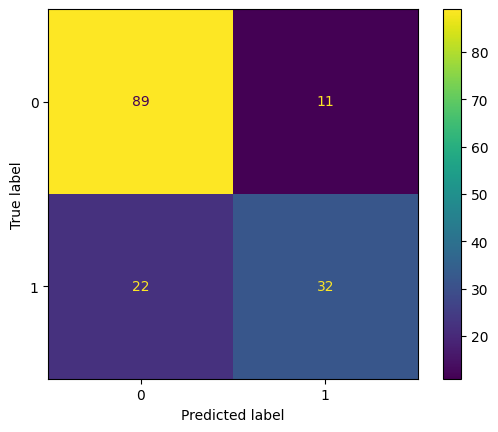

In [106]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
import matplotlib.pyplot as plt
cm = confusion_matrix(y_test, y_pred_test, labels=model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=svm_model.classes_)
disp.plot()
plt.show()

In [78]:
from sklearn import svm

#support vector clsssifier
#support vector kernel = RBF
svm_rbf_model = svm.SVC(kernel='rbf')
svm_rbf_model.fit(x_train,y_train)

SVC()

In [99]:
# Predict Outcome
y_pred_train =svm_rbf_model.predict(x_train)
y_pred_test = svm_rbf_model.predict(x_test)

In [100]:
from sklearn.metrics import accuracy_score , precision_score , recall_score, f1_score

#Precision
precision_train = precision_score(y_true=y_train,y_pred=y_pred_train)
precision_test = precision_score(y_true=y_test,y_pred=y_pred_test)

#Recall
recall_train = recall_score(y_true=y_train,y_pred=y_pred_train)
recall_test = recall_score(y_true=y_test,y_pred=y_pred_test)

#ACC
acc_train = accuracy_score(y_true=y_train,y_pred=y_pred_train)
acc_test = accuracy_score(y_true=y_test,y_pred=y_pred_test)

#F1_score
f1_train = f1_score(y_true=y_train,y_pred=y_pred_train)
f1_test = f1_score(y_true=y_test,y_pred=y_pred_test)

print(f'Precision:\n Train:\n {precision_train}\n Test:\n {precision_test}\n')
print(f'Recall:\n Train:\n {recall_train}\n Test:\n {recall_test}\n')
print(f'Accuracy:\n Train:\n {acc_train}\n Test:\n {acc_test}\n')
print(f'F1 score:\n Train:\n {f1_train}\n Test:\n {f1_test}\n')

Precision:
 Train:
 0.8103448275862069
 Test:
 0.6956521739130435

Recall:
 Train:
 0.6588785046728972
 Test:
 0.5925925925925926

Accuracy:
 Train:
 0.8273615635179153
 Test:
 0.7662337662337663

F1 score:
 Train:
 0.7268041237113401
 Test:
 0.6399999999999999



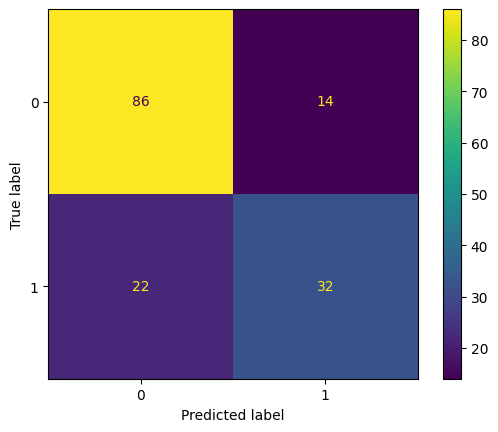

In [101]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
import matplotlib.pyplot as plt
cm = confusion_matrix(y_test, y_pred_test, labels=model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=svm_model.classes_)
disp.plot()
plt.show()

In [82]:
from sklearn import svm

#support vector clsssifier
#support vector kernel = sigmoid
svm_sigmoid_model = svm.SVC(kernel='sigmoid')
svm_sigmoid_model.fit(x_train,y_train)

SVC(kernel='sigmoid')

In [96]:
# Predict Outcome
y_pred_train =svm_rbf_model.predict(x_train)
y_pred_test = svm_rbf_model.predict(x_test)

In [97]:
from sklearn.metrics import accuracy_score , precision_score , recall_score, f1_score

#Precision
precision_train = precision_score(y_true=y_train,y_pred=y_pred_train)
precision_test = precision_score(y_true=y_test,y_pred=y_pred_test)

#Recall
recall_train = recall_score(y_true=y_train,y_pred=y_pred_train)
recall_test = recall_score(y_true=y_test,y_pred=y_pred_test)

#ACC
acc_train = accuracy_score(y_true=y_train,y_pred=y_pred_train)
acc_test = accuracy_score(y_true=y_test,y_pred=y_pred_test)

#F1_score
f1_train = f1_score(y_true=y_train,y_pred=y_pred_train)
f1_test = f1_score(y_true=y_test,y_pred=y_pred_test)

print(f'Precision:\n Train:\n {precision_train}\n Test:\n {precision_test}\n')
print(f'Recall:\n Train:\n {recall_train}\n Test:\n {recall_test}\n')
print(f'Accuracy:\n Train:\n {acc_train}\n Test:\n {acc_test}\n')
print(f'F1 score:\n Train:\n {f1_train}\n Test:\n {f1_test}\n')

Precision:
 Train:
 0.8103448275862069
 Test:
 0.6956521739130435

Recall:
 Train:
 0.6588785046728972
 Test:
 0.5925925925925926

Accuracy:
 Train:
 0.8273615635179153
 Test:
 0.7662337662337663

F1 score:
 Train:
 0.7268041237113401
 Test:
 0.6399999999999999



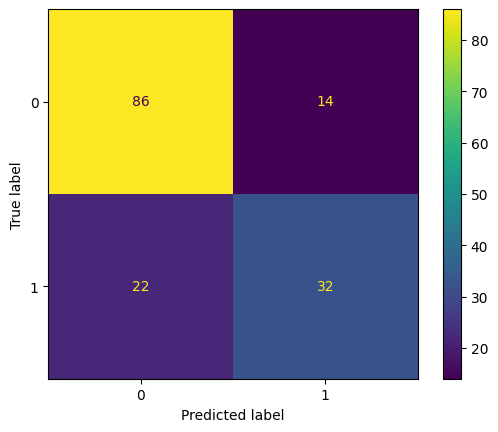

In [98]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
import matplotlib.pyplot as plt
cm = confusion_matrix(y_test, y_pred_test, labels=model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=svm_model.classes_)
disp.plot()
plt.show()

In [88]:
import pickle
# save model
with open('SVM.pkl','wb') as f:
    pickle.dump(svm_model,f)
# load Model
with open('SVM.pkl', 'rb') as f:
    svm_model = pickle.load(f)    

Logistic Regression

In [89]:
from sklearn.linear_model import LogisticRegression
LR_model =LogisticRegression()
LR_model.fit(x_train,y_train)

LogisticRegression()

In [90]:
# Predict Outcome
y_pred_train =LR_model.predict(x_train)
y_pred_test = LR_model.predict(x_test)

In [93]:
from sklearn.metrics import accuracy_score , precision_score , recall_score, f1_score

#Precision
precision_train = precision_score(y_true=y_train,y_pred=y_pred_train)
precision_test = precision_score(y_true=y_test,y_pred=y_pred_test)

#Recall
recall_train = recall_score(y_true=y_train,y_pred=y_pred_train)
recall_test = recall_score(y_true=y_test,y_pred=y_pred_test)

#ACC
acc_train = accuracy_score(y_true=y_train,y_pred=y_pred_train)
acc_test = accuracy_score(y_true=y_test,y_pred=y_pred_test)

#F1_score
f1_train = f1_score(y_true=y_train,y_pred=y_pred_train)
f1_test = f1_score(y_true=y_test,y_pred=y_pred_test)

print(f'Precision:\n Train:\n {precision_train}\n Test:\n {precision_test}\n')
print(f'Recall:\n Train:\n {recall_train}\n Test:\n {recall_test}\n')
print(f'Accuracy:\n Train:\n {acc_train}\n Test:\n {acc_test}\n')
print(f'F1 score:\n Train:\n {f1_train}\n Test:\n {f1_test}\n')

Precision:
 Train:
 0.7352941176470589
 Test:
 0.7209302325581395

Recall:
 Train:
 0.5841121495327103
 Test:
 0.5740740740740741

Accuracy:
 Train:
 0.7817589576547231
 Test:
 0.7727272727272727

F1 score:
 Train:
 0.6510416666666666
 Test:
 0.6391752577319588



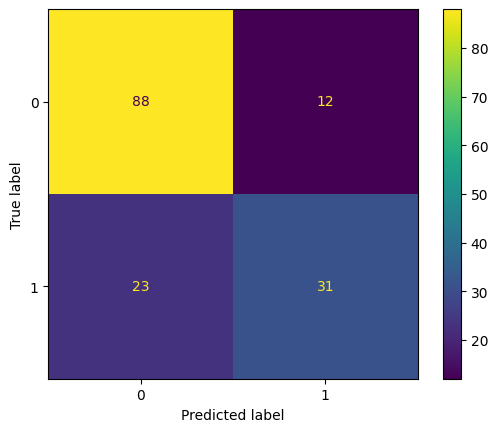

In [94]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
import matplotlib.pyplot as plt
cm = confusion_matrix(y_test, y_pred_test, labels=model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=LR_model.classes_)
disp.plot()
plt.show()

ANN (Artificial Neural Network)

In [121]:
from sklearn.neural_network import MLPClassifier

MLP_model =MLPClassifier(hidden_layer_sizes=64,max_iter=100,solver="adam")
MLP_model.fit(x_train,y_train)

c:\Users\User\.conda\envs\cv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(hidden_layer_sizes=64, max_iter=100)

In [122]:
# Predict Outcome
y_pred_train =MLP_model.predict(x_train)
y_pred_test = MLP_model.predict(x_test)

In [123]:
from sklearn.metrics import accuracy_score , precision_score , recall_score, f1_score

#Precision
precision_train = precision_score(y_true=y_train,y_pred=y_pred_train)
precision_test = precision_score(y_true=y_test,y_pred=y_pred_test)

#Recall
recall_train = recall_score(y_true=y_train,y_pred=y_pred_train)
recall_test = recall_score(y_true=y_test,y_pred=y_pred_test)

#ACC
acc_train = accuracy_score(y_true=y_train,y_pred=y_pred_train)
acc_test = accuracy_score(y_true=y_test,y_pred=y_pred_test)

#F1_score
f1_train = f1_score(y_true=y_train,y_pred=y_pred_train)
f1_test = f1_score(y_true=y_test,y_pred=y_pred_test)

print(f'Precision:\n Train:\n {precision_train}\n Test:\n {precision_test}\n')
print(f'Recall:\n Train:\n {recall_train}\n Test:\n {recall_test}\n')
print(f'Accuracy:\n Train:\n {acc_train}\n Test:\n {acc_test}\n')
print(f'F1 score:\n Train:\n {f1_train}\n Test:\n {f1_test}\n')

Precision:
 Train:
 0.7282608695652174
 Test:
 0.7021276595744681

Recall:
 Train:
 0.6261682242990654
 Test:
 0.6111111111111112

Accuracy:
 Train:
 0.7882736156351792
 Test:
 0.7727272727272727

F1 score:
 Train:
 0.6733668341708543
 Test:
 0.6534653465346535



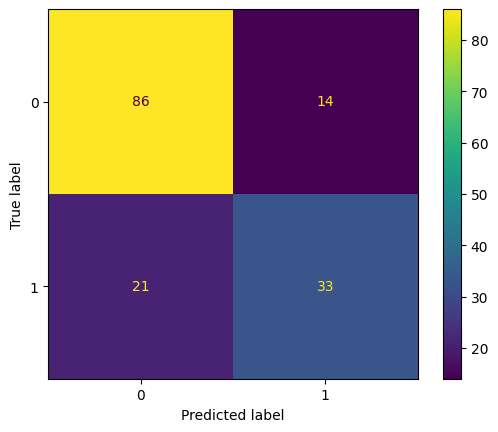

In [124]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
import matplotlib.pyplot as plt
cm = confusion_matrix(y_test, y_pred_test, labels=model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=MLP_model.classes_)
disp.plot()
plt.show()

k-means

In [12]:
from sklearn.cluster import KMeans
KMeans_model = KMeans(n_clusters=2)
KMeans_model.fit(x_train)

c:\Users\mahan\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\mahan\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


KMeans(n_clusters=2)

In [13]:
centers = KMeans_model.cluster_centers_
labels = KMeans_model.labels_

In [16]:
centers

array([[ 0.87062657,  0.39409603,  0.418746  , -0.2602001 , -0.13047925,
         0.0521063 , -0.02523001,  1.05753504],
       [-0.54639569, -0.22292132, -0.18772021,  0.18428881,  0.07133785,
        -0.01070856,  0.01158674, -0.58818443]])

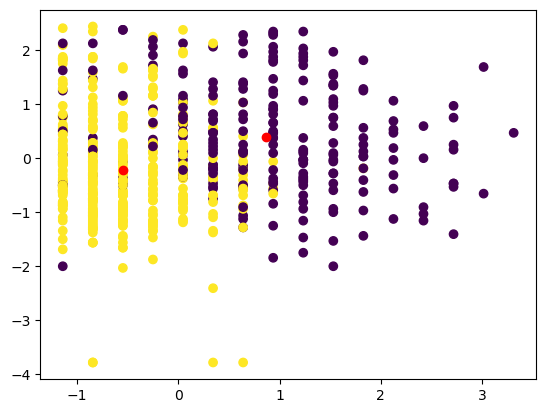

In [24]:
import matplotlib.pyplot as plt
plt.scatter(x_train[:,0],x_train[:,1],c=labels)
plt.scatter(centers[:,0],centers[:,1],c='r')
plt.show()

In [10]:
from sklearn.datasets import make_blobs


#Y:index of cluster
X,y = make_blobs(n_samples=300,n_features=2,centers=3)

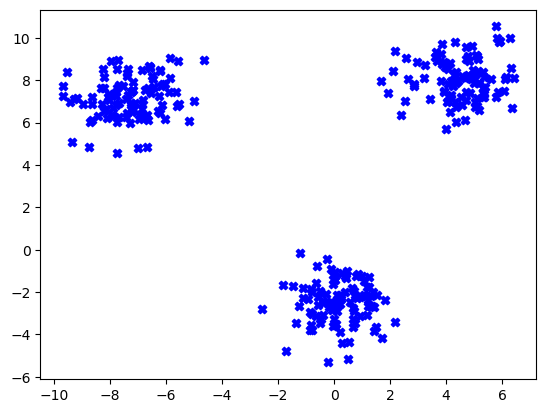

In [13]:
import matplotlib.pyplot as plt
plt.scatter(X[:,0],X[:,1],c='b',marker='X')
plt.show()

In [14]:
from sklearn.cluster import KMeans
KMeans_model = KMeans(n_clusters=3)
KMeans_model.fit(X)

c:\Users\mahan\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\mahan\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


KMeans(n_clusters=3)

In [15]:
centers = KMeans_model.cluster_centers_
labels = KMeans_model.labels_

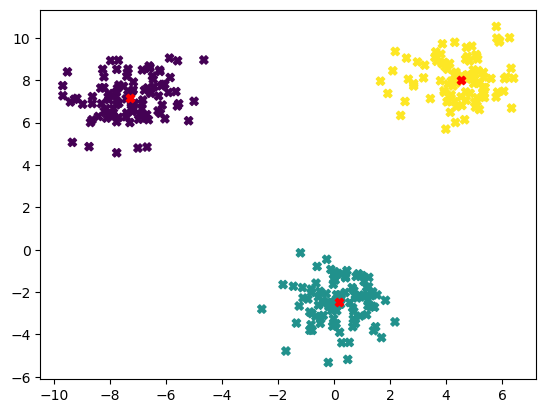

In [18]:
import matplotlib.pyplot as plt
plt.scatter(X[:,0],X[:,1],c=labels,marker='X')
plt.scatter(centers[:,0],centers[:,1],c='r',marker='X')
plt.show()

PCA (Principle Component Analysis)

In [37]:
from sklearn.decomposition import PCA

pca =PCA(n_components=3)
pca.fit(x_train)

PCA(n_components=3)

In [38]:
x_new_train =pca.transform(x_train)
x_new_test =pca.transform(x_test)

In [39]:
x_train.shape,x_new_train.shape

((614, 8), (614, 3))

In [40]:
x_test.shape,x_new_test.shape

((154, 8), (154, 3))

In [41]:
from sklearn.neural_network import MLPClassifier

MLP_model =MLPClassifier(hidden_layer_sizes=64,max_iter=100,solver="adam")
MLP_model.fit(x_new_train,y_train)

c:\Users\mahan\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(hidden_layer_sizes=64, max_iter=100)

In [42]:
# Predict Outcome
y_new_pred_train =MLP_model.predict(x_new_train)
y_new_pred_test = MLP_model.predict(x_new_test)

In [43]:
from sklearn.metrics import accuracy_score , precision_score , recall_score, f1_score

#Precision
precision_train = precision_score(y_true=y_train,y_pred=y_new_pred_train)
precision_test = precision_score(y_true=y_test,y_pred=y_new_pred_test)

#Recall
recall_train = recall_score(y_true=y_train,y_pred=y_new_pred_train)
recall_test = recall_score(y_true=y_test,y_pred=y_new_pred_test)

#ACC
acc_train = accuracy_score(y_true=y_train,y_pred=y_new_pred_train)
acc_test = accuracy_score(y_true=y_test,y_pred=y_new_pred_test)

#F1_score
f1_train = f1_score(y_true=y_train,y_pred=y_new_pred_train)
f1_test = f1_score(y_true=y_test,y_pred=y_new_pred_test)

print(f'Precision:\n Train:\n {precision_train}\n Test:\n {precision_test}\n')
print(f'Recall:\n Train:\n {recall_train}\n Test:\n {recall_test}\n')
print(f'Accuracy:\n Train:\n {acc_train}\n Test:\n {acc_test}\n')
print(f'F1 score:\n Train:\n {f1_train}\n Test:\n {f1_test}\n')

Precision:
 Train:
 0.6807228915662651
 Test:
 0.7272727272727273

Recall:
 Train:
 0.5280373831775701
 Test:
 0.5925925925925926

Accuracy:
 Train:
 0.749185667752443
 Test:
 0.7792207792207793

F1 score:
 Train:
 0.5947368421052632
 Test:
 0.6530612244897959



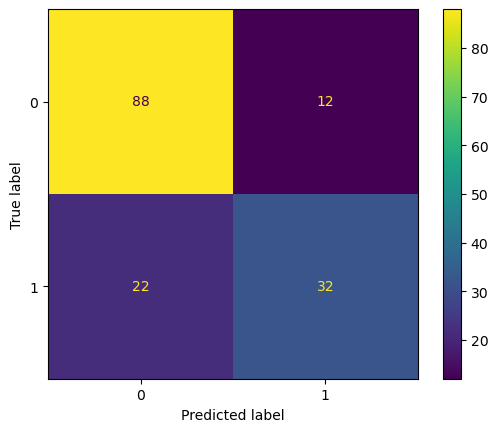

In [44]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
import matplotlib.pyplot as plt
cm = confusion_matrix(y_test, y_new_pred_test, labels=MLP_model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=MLP_model.classes_)
disp.plot()
plt.show()

In [45]:
import pickle
# save model
with open('PCA.pkl','wb') as f:
    pickle.dump(pca,f)
# load Model
with open('PCA.pkl', 'rb') as f:
    pca = pickle.load(f)    

In [46]:
import pickle
# save model
with open('PCA-MLP.pkl','wb') as f:
    pickle.dump(MLP_model,f)
# load Model
with open('PCA-MLP.pkl', 'rb') as f:
    MLP_model = pickle.load(f)    

LDA (Linear Discriminant Analysis)

In [11]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

lda = LinearDiscriminantAnalysis()
lda.fit(x_train, y_train)

LinearDiscriminantAnalysis()

In [13]:
# Predict Outcome
y_pred_train =lda.predict(x_train)
y_pred_test = lda.predict(x_test)

In [14]:
from sklearn.metrics import accuracy_score , precision_score , recall_score, f1_score

#Precision
precision_train = precision_score(y_true=y_train,y_pred=y_new_pred_train)
precision_test = precision_score(y_true=y_test,y_pred=y_new_pred_test)

#Recall
recall_train = recall_score(y_true=y_train,y_pred=y_new_pred_train)
recall_test = recall_score(y_true=y_test,y_pred=y_new_pred_test)

#ACC
acc_train = accuracy_score(y_true=y_train,y_pred=y_new_pred_train)
acc_test = accuracy_score(y_true=y_test,y_pred=y_new_pred_test)

#F1_score
f1_train = f1_score(y_true=y_train,y_pred=y_new_pred_train)
f1_test = f1_score(y_true=y_test,y_pred=y_new_pred_test)

print(f'Precision:\n Train:\n {precision_train}\n Test:\n {precision_test}\n')
print(f'Recall:\n Train:\n {recall_train}\n Test:\n {recall_test}\n')
print(f'Accuracy:\n Train:\n {acc_train}\n Test:\n {acc_test}\n')
print(f'F1 score:\n Train:\n {f1_train}\n Test:\n {f1_test}\n')

Precision:
 Train:
 0.7317073170731707
 Test:
 0.75

Recall:
 Train:
 0.5607476635514018
 Test:
 0.6666666666666666

Accuracy:
 Train:
 0.7752442996742671
 Test:
 0.8051948051948052

F1 score:
 Train:
 0.634920634920635
 Test:
 0.7058823529411765



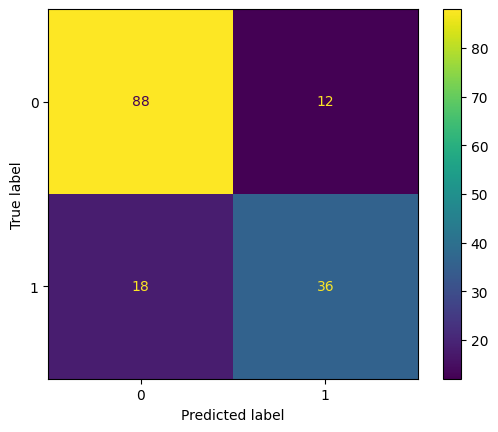

In [15]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
import matplotlib.pyplot as plt
cm = confusion_matrix(y_test, y_pred_test, labels=lda.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=lda.classes_)
disp.plot()
plt.show()

In [16]:
import pickle
# save model
with open('LDA.pkl','wb') as f:
    pickle.dump(lda,f)
# load Model
with open('LDA.pkl', 'rb') as f:
    lda = pickle.load(f)    

ICA (Independent Component Analysis)

In [17]:
from sklearn.decomposition import FastICA
ica = FastICA(n_components=8)
ica.fit(x_train)

FastICA(n_components=8)

In [18]:
x_new_train =ica.transform(x_train)
x_new_test =ica.transform(x_test)

In [19]:
from sklearn.neural_network import MLPClassifier

MLP_model =MLPClassifier(hidden_layer_sizes=64,max_iter=100,solver="adam")
MLP_model.fit(x_new_train,y_train)

c:\Users\User\.conda\envs\cv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(hidden_layer_sizes=64, max_iter=100)

In [20]:
# Predict Outcome
y_new_pred_train =MLP_model.predict(x_new_train)
y_new_pred_test = MLP_model.predict(x_new_test)

In [21]:
from sklearn.metrics import accuracy_score , precision_score , recall_score, f1_score

#Precision
precision_train = precision_score(y_true=y_train,y_pred=y_new_pred_train)
precision_test = precision_score(y_true=y_test,y_pred=y_new_pred_test)

#Recall
recall_train = recall_score(y_true=y_train,y_pred=y_new_pred_train)
recall_test = recall_score(y_true=y_test,y_pred=y_new_pred_test)

#ACC
acc_train = accuracy_score(y_true=y_train,y_pred=y_new_pred_train)
acc_test = accuracy_score(y_true=y_test,y_pred=y_new_pred_test)

#F1_score
f1_train = f1_score(y_true=y_train,y_pred=y_new_pred_train)
f1_test = f1_score(y_true=y_test,y_pred=y_new_pred_test)

print(f'Precision:\n Train:\n {precision_train}\n Test:\n {precision_test}\n')
print(f'Recall:\n Train:\n {recall_train}\n Test:\n {recall_test}\n')
print(f'Accuracy:\n Train:\n {acc_train}\n Test:\n {acc_test}\n')
print(f'F1 score:\n Train:\n {f1_train}\n Test:\n {f1_test}\n')

Precision:
 Train:
 0.7386363636363636
 Test:
 0.7346938775510204

Recall:
 Train:
 0.6074766355140186
 Test:
 0.6666666666666666

Accuracy:
 Train:
 0.7882736156351792
 Test:
 0.7987012987012987

F1 score:
 Train:
 0.6666666666666667
 Test:
 0.6990291262135923



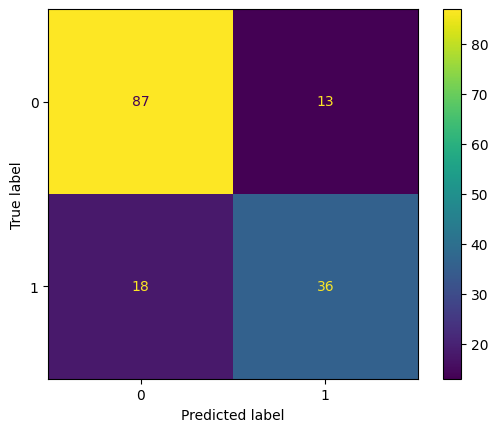

In [24]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
import matplotlib.pyplot as plt
cm = confusion_matrix(y_test, y_new_pred_test, labels=MLP_model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=MLP_model.classes_)
disp.plot()
plt.show()

In [25]:
import pickle
# save MLP model
with open('ICA-MLP.pkl','wb') as f:
    pickle.dump(MLP_model,f)
# load MLP Model
with open('ICA-MLP.pkl', 'rb') as f:
    MLP_model = pickle.load(f)    
# save ICA model
with open('ICA.pkl','wb') as f:
    pickle.dump(ica,f)
# load ICA Model
with open('ICA.pkl', 'rb') as f:
    ica = pickle.load(f)        